# Addition of new_deaths/confirmed and smoothed (7 days) data

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from IPython import display

## 1. Death Data

In [2]:
# Reading file as dictionary
df = pd.read_excel('Spain_OWID_Confirmed_Deaths.xlsx')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,ESP,Europe,Spain,2020-01-22,0,0.0,0,0.0
1,ESP,Europe,Spain,2020-01-23,0,0.0,0,0.0
2,ESP,Europe,Spain,2020-01-24,0,0.0,0,0.0
3,ESP,Europe,Spain,2020-01-25,0,0.0,0,0.0
4,ESP,Europe,Spain,2020-01-26,0,0.0,0,0.0


In [3]:
# Obtaining the deaths values since the beginning
T_deaths_original = df.values[:,6]

T_deaths_original[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3,
       5, 10, 17, 28, 35, 54], dtype=object)

In [4]:
# Creation of New Deaths (Death[t] - Death[t-1])

N_deaths = np.empty(len(T_deaths_original), dtype = object)
N_deaths[0] = 0  # First value is 0
for i in range(1, len(N_deaths)):
    result = T_deaths_original[i] - T_deaths_original[i-1]
    if result >= 0:
        N_deaths[i] = result
    else:
        N_deaths[i] = 0

N_deaths.shape, N_deaths

((793,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        2, 5, 7, 11, 7, 19, 1, 78, 62, 94, 53, 191, 90, 207, 213, 332, 397,
        539, 497, 839, 718, 773, 844, 821, 913, 748, 923, 961, 850, 749,
        694, 700, 704, 747, 655, 634, 525, 603, 547, 300, 652, 607, 687,
        41, 410, 399, 430, 435, 440, 367, 378, 288, 331, 301, 453, 268, 0,
        557, 164, 164, 185, 244, 213, 229, 179, 143, 123, 176, 184, 217,
        138, 104, 0, 146, 69, 110, 52, 688, 50, 74, 0, 283, 0, 2, 2, 4, 2,
        0, 0, 1, 5, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1179, 7, 1,
        1, 1, 2, 3, 8, 3, 2, 3, 9, 9, 4, 17, 0, 0, 3, 4, 4, 5, 2, 0, 0, 3,
        3, 4, 3, 4, 0, 0, 2, 2, 2, 3, 3, 0, 0, 2, 2, 5, 2, 2, 0, 0, 27, 26,
        1, 1, 3, 0, 0, 73, 5, 0, 26, 12, 0, 0, 29, 24, 127, 16, 25, 0, 0,
        34, 52, 47, 25, 15, 0, 0, 83, 58, 42, 40, 184, 0, 0, 98, 78, 34,
        71, 48, 0, 0, 101,

In [5]:
# Creation of New Deaths Smoothed (7 days average)

N_deaths_smooth = np.empty(len(T_deaths_original)-6, dtype = object)  # 6 first values are lost when smoothing in 7 days
for i in range(0, len(T_deaths_original)-6):
    sum_N = 0
    for j in range(i, i+7):
        sum_N = sum_N + N_deaths[j]
    N_deaths_smooth[i] = (sum_N/7)

N_deaths_smooth.shape, N_deaths_smooth

((787,),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285,
        0.2857142857142857, 0.42857142857142855, 0.7142857142857143,
        1.4285714285714286, 2.4285714285714284, 4.0, 4.857142857142857,
        7.428571428571429, 7.428571428571429, 18.285714285714285,
        26.428571428571427, 38.857142857142854, 44.857142857142854,
        71.14285714285714, 81.28571428571429, 110.71428571428571, 130.0,
        168.57142857142858, 211.85714285714286, 281.2857142857143, 325.0,
        432.0, 505.0, 585.0, 658.1428571428571, 718.7142857142857,
        772.1428571428571, 808.0, 820.0, 854.7142857142857,
        865.7142857142857, 852.1428571428571, 834.0, 803.5714285714286,
        797.2857142857143, 772.1428571428571, 728.4285714285714,
        697.5714285714286, 665.5714285714286, 652.5714285714286,
        630.71428571

In [6]:
# Creation of Fixed Total Deaths (Accumulative sum of N_deaths array)
T_deaths_fix = np.empty(len(T_deaths_original), dtype = object)
T_deaths_fix[0] = 0

sum_T = 0
for i in range(1, len(T_deaths_original)):
    sum_T = sum_T + N_deaths[i]
    T_deaths_fix[i] = sum_T

T_deaths_fix.shape, T_deaths_fix

((793,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3,
        5, 10, 17, 28, 35, 54, 55, 133, 195, 289, 342, 533, 623, 830, 1043,
        1375, 1772, 2311, 2808, 3647, 4365, 5138, 5982, 6803, 7716, 8464,
        9387, 10348, 11198, 11947, 12641, 13341, 14045, 14792, 15447,
        16081, 16606, 17209, 17756, 18056, 18708, 19315, 20002, 20043,
        20453, 20852, 21282, 21717, 22157, 22524, 22902, 23190, 23521,
        23822, 24275, 24543, 24543, 25100, 25264, 25428, 25613, 25857,
        26070, 26299, 26478, 26621, 26744, 26920, 27104, 27321, 27459,
        27563, 27563, 27709, 27778, 27888, 27940, 28628, 28678, 28752,
        28752, 29035, 29035, 29037, 29039, 29043, 29045, 29045, 29045,
        29046, 29051, 29052, 29053, 29054, 29054, 29054, 29054, 29054,
        29054, 29054, 29054, 29054, 29054, 29054, 29054, 30233, 30240,
        30241, 30242, 30243, 30245, 30248, 30256, 30259

In [7]:
# Creation of Total Deaths Fixed Smoothed (7 days average)

T_deaths_smooth_fix = np.empty(len(T_deaths_original)-6, dtype = object)  # 6 first values are not available
for i in range(0, len(T_deaths_original)-6):
    sum_T = 0
    for j in range(i, i+7):
        sum_T = sum_T + T_deaths_fix[j]
    T_deaths_smooth_fix[i] = (sum_T/7)

T_deaths_smooth_fix.shape, T_deaths_smooth_fix

((787,),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285,
        0.42857142857142855, 0.8571428571428571, 1.5714285714285714, 3.0,
        5.428571428571429, 9.428571428571429, 14.285714285714286,
        21.714285714285715, 29.142857142857142, 47.42857142857143,
        73.85714285714286, 112.71428571428571, 157.57142857142858,
        228.71428571428572, 310.0, 420.7142857142857, 550.7142857142857,
        719.2857142857143, 931.1428571428571, 1212.4285714285713,
        1537.4285714285713, 1969.4285714285713, 2474.4285714285716,
        3059.4285714285716, 3717.5714285714284, 4436.285714285715,
        5208.428571428572, 6016.428571428572, 6836.428571428572,
        7691.142857142857, 8556.857142857143, 9409.0, 10243.0,
        11046.57142857143, 11843.857142857143, 12616.0, 13344.42857142857,
        14042.0, 147

In [8]:
# Collecting the dates

dates = df.values[:,3]
dates.shape, dates[0:15]

((793,),
 array([Timestamp('2020-01-22 00:00:00'), Timestamp('2020-01-23 00:00:00'),
        Timestamp('2020-01-24 00:00:00'), Timestamp('2020-01-25 00:00:00'),
        Timestamp('2020-01-26 00:00:00'), Timestamp('2020-01-27 00:00:00'),
        Timestamp('2020-01-28 00:00:00'), Timestamp('2020-01-29 00:00:00'),
        Timestamp('2020-01-30 00:00:00'), Timestamp('2020-01-31 00:00:00'),
        Timestamp('2020-02-01 00:00:00'), Timestamp('2020-02-02 00:00:00'),
        Timestamp('2020-02-03 00:00:00'), Timestamp('2020-02-04 00:00:00'),
        Timestamp('2020-02-05 00:00:00')], dtype=object))

In [9]:
"""
# Data is not uniform: there are string objects and datetime objects

from datetime import datetime

fm_dt = dates[15].strftime("%#m/%#d/%y")  # Transform datetime to string in date/month/year
print("Original datetime object: {}".format(dates[15]))
print("Transformed to string: {}".format(fm_dt))

# https://strftime.org/: Python strftime cheatsheet
"""

'\n# Data is not uniform: there are string objects and datetime objects\n\nfrom datetime import datetime\n\nfm_dt = dates[15].strftime("%#m/%#d/%y")  # Transform datetime to string in date/month/year\nprint("Original datetime object: {}".format(dates[15]))\nprint("Transformed to string: {}".format(fm_dt))\n\n# https://strftime.org/: Python strftime cheatsheet\n'

In [10]:
"""
# Correction of the dates format: transform datetime objects to string objects with the same format

tf_dates = dates.copy()  # Duplicate dates into another array
for i in range(len(tf_dates)):
    # If the date is a datetime object, it will be transformed to a string
    try:
        fm_dt = tf_dates[i].strftime("%#d/%#m/%y")
        tf_dates[i] = fm_dt
    # If the date is already a string, it will not be changed
    except:
        tf_dates[i] = tf_dates[i]

print(tf_dates[0:20])
"""

'\n# Correction of the dates format: transform datetime objects to string objects with the same format\n\ntf_dates = dates.copy()  # Duplicate dates into another array\nfor i in range(len(tf_dates)):\n    # If the date is a datetime object, it will be transformed to a string\n    try:\n        fm_dt = tf_dates[i].strftime("%#d/%#m/%y")\n        tf_dates[i] = fm_dt\n    # If the date is already a string, it will not be changed\n    except:\n        tf_dates[i] = tf_dates[i]\n\nprint(tf_dates[0:20])\n'

In [11]:
# Checking if dates and data points have the same length
len(dates), len(T_deaths_original)

(793, 793)

In [12]:
# Create array with the iso_code of the country
iso_code = np.empty(len(dates), dtype = object)
for i in range(len(iso_code)):
    iso_code[i] = 'ESP'
    
iso_code.shape, iso_code[0:10]

((793,),
 array(['ESP', 'ESP', 'ESP', 'ESP', 'ESP', 'ESP', 'ESP', 'ESP', 'ESP',
        'ESP'], dtype=object))

In [13]:
# Create array with the continent of the country
continent = np.empty(len(dates), dtype = object)
for i in range(len(continent)):
    continent[i] = 'Europe'
    
continent.shape, continent[0:10]

((793,),
 array(['Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe',
        'Europe', 'Europe', 'Europe', 'Europe'], dtype=object))

In [14]:
# Create array with the name of the country
region = np.empty(len(dates), dtype = object)
for i in range(len(region)):
    region[i] = 'Spain'
    
region.shape, region[0:10]

((793,),
 array(['Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain',
        'Spain', 'Spain', 'Spain'], dtype=object))

In [15]:
# Array concatenation for building the final dataframe

columns = 9  # Number of columns
X_total = np.empty((len(T_deaths_smooth_fix), columns), dtype = object)

# The first 6 values are not included to match the length of N_deaths_smooth
for i in range(len(T_deaths_smooth_fix)):
    X_total[i] = [iso_code[i+6], continent[i+6], region[i+6], dates[i+6], T_deaths_original[i+6],
                  N_deaths[i+6], N_deaths_smooth[i], T_deaths_fix[i+6], T_deaths_smooth_fix[i]]
    
X_total.shape, X_total[0:10]

((787, 9),
 array([['ESP', 'Europe', 'Spain', Timestamp('2020-01-28 00:00:00'), 0, 0,
         0.0, 0, 0.0],
        ['ESP', 'Europe', 'Spain', Timestamp('2020-01-29 00:00:00'), 0, 0,
         0.0, 0, 0.0],
        ['ESP', 'Europe', 'Spain', Timestamp('2020-01-30 00:00:00'), 0, 0,
         0.0, 0, 0.0],
        ['ESP', 'Europe', 'Spain', Timestamp('2020-01-31 00:00:00'), 0, 0,
         0.0, 0, 0.0],
        ['ESP', 'Europe', 'Spain', Timestamp('2020-02-01 00:00:00'), 0, 0,
         0.0, 0, 0.0],
        ['ESP', 'Europe', 'Spain', Timestamp('2020-02-02 00:00:00'), 0, 0,
         0.0, 0, 0.0],
        ['ESP', 'Europe', 'Spain', Timestamp('2020-02-03 00:00:00'), 0, 0,
         0.0, 0, 0.0],
        ['ESP', 'Europe', 'Spain', Timestamp('2020-02-04 00:00:00'), 0, 0,
         0.0, 0, 0.0],
        ['ESP', 'Europe', 'Spain', Timestamp('2020-02-05 00:00:00'), 0, 0,
         0.0, 0, 0.0],
        ['ESP', 'Europe', 'Spain', Timestamp('2020-02-06 00:00:00'), 0, 0,
         0.0, 0, 0.0]], dtype=ob

In [16]:
# Labels of each column of the dataframe
labels = ['ISO_code', 'Continent', 'Country/Region', 'Date', 'Total Deaths', 'New Deaths',
          'New Deaths Smooth (7 days)', 'Total Deaths Fixed (sum New Deaths)', 'Total Deaths Fixed Smooth (7 days)']

In [17]:
# Creation of the final dataframe
df_deaths = pd.DataFrame(data=X_total, columns=labels)
df_deaths

,ISO_code,Continent,Country/Region,Date,Total Deaths,New Deaths,New Deaths Smooth (7 days),Total Deaths Fixed (sum New Deaths),Total Deaths Fixed Smooth (7 days)
0,ESP,Europe,Spain,2020-01-28,0,0,0,0,0
1,ESP,Europe,Spain,2020-01-29,0,0,0,0,0
2,ESP,Europe,Spain,2020-01-30,0,0,0,0,0
3,ESP,Europe,Spain,2020-01-31,0,0,0,0,0
4,ESP,Europe,Spain,2020-02-01,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
782,ESP,Europe,Spain,2022-03-20,101703,0,81.1429,103623,103419
783,ESP,Europe,Spain,2022-03-21,101703,0,81.1429,103623,103500
784,ESP,Europe,Spain,2022-03-22,102053,350,91,103973,103591
785,ESP,Europe,Spain,2022-03-23,102053,0,91,103973,103682


In [18]:
# Export dataframe to a csv file

from pathlib import Path  
filepath = Path('Deaths_Spain.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_deaths.to_csv(filepath, index=False)

## 2. Confirmed Data

In [19]:
# Reading file as dictionary
df = pd.read_excel('Spain_OWID_Confirmed_Deaths.xlsx')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,ESP,Europe,Spain,2020-01-22,0,0.0,0,0.0
1,ESP,Europe,Spain,2020-01-23,0,0.0,0,0.0
2,ESP,Europe,Spain,2020-01-24,0,0.0,0,0.0
3,ESP,Europe,Spain,2020-01-25,0,0.0,0,0.0
4,ESP,Europe,Spain,2020-01-26,0,0.0,0,0.0


In [20]:
# Obtaining the confirmed values since the beginning
T_cases_original = df.values[:,4]
N_cases_original = df.values[:,5]

T_cases_original[0:20], N_cases_original[0:20]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2],
       dtype=object),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], dtype=object))

In [21]:
# Creation of New Confirmed (Confirmed[t] - Confirmed[t-1])

N_confirmed = np.empty(len(T_cases_original), dtype = object)
N_confirmed[0] = 0  # First value is 0
for i in range(1, len(N_confirmed)):
    result = T_cases_original[i] - T_cases_original[i-1]
    if result >= 0:
        N_confirmed[i] = result
    else:
        N_confirmed[i] = 0

N_confirmed.shape, N_confirmed

((793,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 7, 2, 17, 13, 39, 36, 45,
        57, 37, 141, 100, 173, 400, 622, 582, 0, 2955, 1159, 1407, 2144,
        1806, 2162, 4053, 2447, 4964, 3394, 6368, 4749, 9630, 8271, 7933,
        7516, 6875, 7846, 7967, 8195, 7947, 7134, 6969, 5478, 5029, 5267,
        6278, 5002, 5051, 4754, 3804, 3268, 2442, 5103, 7304, 5891, 887,
        6948, 1536, 3968, 4211, 4635, 0, 2915, 1729, 1831, 1308, 2144, 518,
        1781, 1366, 884, 545, 1318, 996, 1122, 1410, 721, 772, 3086, 594,
        661, 849, 643, 515, 0, 908, 431, 518, 482, 1787, 466, 482, 0, 859,
        0, 1647, 658, 664, 251, 159, 294, 394, 334, 318, 332, 240, 167,
        249, 314, 427, 502, 396, 323, 181, 219, 355, 585, 307, 363, 334,
        232, 248, 334, 400, 419, 564, 301, 200, 301, 388, 444, 442, 0, 0,
        1244, 341, 383, 543, 852, 0, 0, 2045, 666, 875, 1361, 1400, 0, 0,
        4581, 1358, 1357, 2615, 

In [22]:
# Creation of New Confirmed Smoothed (7 days average)

N_confirmed_smooth = np.empty(len(T_cases_original)-6, dtype = object)  # 6 first values are not available
for i in range(0, len(N_confirmed)-6):
    sum_N = 0
    for j in range(i, i+7):
        sum_N = sum_N + N_confirmed[j]
    N_confirmed_smooth[i] = (sum_N/7)

N_confirmed_smooth.shape, N_confirmed_smooth

((787,),
 array([0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.14285714285714285,
        0.14285714285714285, 0.14285714285714285, 0.14285714285714285,
        0.14285714285714285, 0.14285714285714285, 0.0, 0.14285714285714285,
        0.14285714285714285, 0.14285714285714285, 0.14285714285714285,
        0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5714285714285714,
        1.5714285714285714, 1.8571428571428572, 4.285714285714286,
        6.142857142857143, 11.714285714285714, 16.857142857142858,
        22.714285714285715, 29.857142857142858, 34.857142857142854,
        52.57142857142857, 65.0, 84.14285714285714, 136.14285714285714,
        218.57142857142858, 293.57142857142856, 288.2857142857143,
        690.2857142857143, 841.5714285714286, 1017.8571428571429, 1267.0,
        1436.142857142857, 1661.857142857143, 2240.8571428571427,
        2168.285714285714, 2711.8571428571427, 2995.714285714286,
        3599

In [23]:
# Creation of Fixed Total Confirmed (Accumulative sum of N_confirmed array)
T_confirmed_fix = np.empty(len(N_confirmed), dtype = object)
T_confirmed_fix[0] = 0

sum_T = 0
for i in range(1, len(N_confirmed)):
    sum_T = sum_T + N_confirmed[i]
    T_confirmed_fix[i] = sum_T

T_confirmed_fix.shape, T_confirmed_fix

((793,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 13, 15, 32, 45, 84, 120,
        165, 222, 259, 400, 500, 673, 1073, 1695, 2277, 2277, 5232, 6391,
        7798, 9942, 11748, 13910, 17963, 20410, 25374, 28768, 35136, 39885,
        49515, 57786, 65719, 73235, 80110, 87956, 95923, 104118, 112065,
        119199, 126168, 131646, 136675, 141942, 148220, 153222, 158273,
        163027, 166831, 170099, 172541, 177644, 184948, 190839, 191726,
        198674, 200210, 204178, 208389, 213024, 213024, 215939, 217668,
        219499, 220807, 222951, 223469, 225250, 226616, 227500, 228045,
        229363, 230359, 231481, 232891, 233612, 234384, 237470, 238064,
        238725, 239574, 240217, 240732, 240732, 241640, 242071, 242589,
        243071, 244858, 245324, 245806, 245806, 246665, 246665, 248312,
        248970, 249634, 249885, 250044, 250338, 250732, 251066, 251384,
        251716, 251956, 252123, 252372, 252686

In [24]:
# Creation of Fixed Total Alive Confirmed (Accumulative sum of N_confirmed array - Total Deaths)
T_confirmed_alive_fix = np.empty(len(T_confirmed_fix), dtype = object)

for i in range(0, len(T_confirmed_fix)):
    T_confirmed_alive_fix[i] = T_confirmed_fix[i] - T_deaths_fix[i]

T_confirmed_alive_fix.shape, T_confirmed_alive_fix

((793,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 13, 15, 32, 45, 84, 120,
        164, 220, 256, 395, 490, 656, 1045, 1660, 2223, 2222, 5099, 6196,
        7509, 9600, 11215, 13287, 17133, 19367, 23999, 26996, 32825, 37077,
        45868, 53421, 60581, 67253, 73307, 80240, 87459, 94731, 101717,
        108001, 114221, 119005, 123334, 127897, 133428, 137775, 142192,
        146421, 149622, 152343, 154485, 158936, 165633, 170837, 171683,
        178221, 179358, 182896, 186672, 190867, 190500, 193037, 194478,
        195978, 196985, 198676, 198926, 200707, 201516, 202236, 202617,
        203750, 204502, 205411, 206592, 207134, 207763, 210726, 211144,
        211621, 212253, 212758, 213169, 213169, 213931, 214293, 214701,
        215131, 216230, 216646, 217054, 217054, 217630, 217630, 219275,
        219931, 220591, 220840, 220999, 221293, 221686, 222015, 222332,
        222663, 222902, 223069, 223318, 223632,

In [25]:
# Alive Confirmed Accumulated (14 days)
# Infected Group: once a person becomes infected, they will stay in the infected group for 14 days

Ac_confirmed_alive = np.empty(len(N_confirmed), dtype = object)

# First 14 values
for i in range(0, 14, 1):
    Ac_confirmed_alive[i] = T_confirmed_alive_fix[i]

# Rest of values: confirmed accumulated in 14 days range (from t to t-13)
for i in range(14, len(T_confirmed_fix), 1):
    Ac_confirmed_alive[i] = T_confirmed_alive_fix[i] - T_confirmed_alive_fix[i-14]

Ac_confirmed_alive.shape, Ac_confirmed_alive

((793,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 4, 11, 13, 30, 43, 82, 118,
        162, 218, 254, 393, 488, 654, 1043, 1654, 2210, 2207, 5067, 6151,
        7425, 9480, 11051, 13067, 16877, 18972, 23509, 26340, 31780, 35417,
        43645, 51199, 55482, 61057, 65798, 70640, 76244, 81444, 84584,
        88634, 90222, 92009, 90509, 90820, 87560, 84354, 81611, 79168,
        76315, 72103, 67026, 64205, 63916, 62836, 57462, 59216, 56024,
        54999, 53244, 53092, 48308, 46616, 44856, 43635, 42500, 39740,
        33293, 29870, 29833, 24015, 23259, 20854, 17830, 14544, 16092,
        14097, 13285, 14748, 14159, 12945, 13327, 12051, 11653, 10933,
        11314, 10543, 10199, 9720, 9638, 9512, 9291, 6328, 6486, 6009,
        7022, 7173, 7422, 7671, 7068, 7000, 6985, 6884, 6102, 6017, 5848,
        6015, 5688, 6002, 4784, 4630, 4366, 4440, 4462, 4387, 4349, 4605,
        3416, 3441, 3535, 3599, 3597, 3615, 3585, 

In [26]:
# Creation of Alive Accumulated Confirmed Smoothed (14 days - 7 days average)

Ac_confirmed_alive_smooth = np.empty(len(T_cases_original)-6, dtype = object)  # 6 first values are lost when smoothing
for i in range(0, len(Ac_confirmed_alive)-6):
    sum_Ac = 0
    for j in range(i, i+7):
        sum_Ac = sum_Ac + Ac_confirmed_alive[j]
    Ac_confirmed_alive_smooth[i] = (sum_Ac/7)

Ac_confirmed_alive_smooth.shape, Ac_confirmed_alive_smooth

((787,),
 array([0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.2857142857142857,
        0.42857142857142855, 0.5714285714285714, 0.7142857142857143,
        0.8571428571428571, 1.0, 1.0, 1.1428571428571428,
        1.2857142857142858, 1.4285714285714286, 1.5714285714285714,
        1.7142857142857142, 1.8571428571428572, 1.8571428571428572,
        1.7142857142857142, 1.5714285714285714, 1.4285714285714286,
        1.2857142857142858, 1.1428571428571428, 1.0, 1.0,
        0.8571428571428571, 0.7142857142857143, 1.1428571428571428,
        2.5714285714285716, 4.285714285714286, 8.428571428571429,
        14.428571428571429, 26.142857142857142, 43.0, 65.57142857142857,
        95.14285714285714, 129.57142857142858, 181.42857142857142, 245.0,
        326.7142857142857, 458.85714285714283, 672.0, 956.5714285714286,
        1235.5714285714287, 1903.2857142857142, 2712.285714285714,
        3679.5714285714284, 4884.857142857143, 6227.285714285715,
        7778.285714285715, 9874.0, 11860.42857

In [27]:
# Collecting the dates

dates = df.values[:,3]
dates.shape, dates[0:15]

((793,),
 array([Timestamp('2020-01-22 00:00:00'), Timestamp('2020-01-23 00:00:00'),
        Timestamp('2020-01-24 00:00:00'), Timestamp('2020-01-25 00:00:00'),
        Timestamp('2020-01-26 00:00:00'), Timestamp('2020-01-27 00:00:00'),
        Timestamp('2020-01-28 00:00:00'), Timestamp('2020-01-29 00:00:00'),
        Timestamp('2020-01-30 00:00:00'), Timestamp('2020-01-31 00:00:00'),
        Timestamp('2020-02-01 00:00:00'), Timestamp('2020-02-02 00:00:00'),
        Timestamp('2020-02-03 00:00:00'), Timestamp('2020-02-04 00:00:00'),
        Timestamp('2020-02-05 00:00:00')], dtype=object))

In [28]:
"""
# Data is not uniform: there are string objects and datetime objects

from datetime import datetime

fm_dt = dates[15].strftime("%#m/%#d/%y")  # Transform datetime to string in date/month/year
print("Original datetime object: {}".format(dates[15]))
print("Transformed to string: {}".format(fm_dt))

# https://strftime.org/: Python strftime cheatsheet
"""

'\n# Data is not uniform: there are string objects and datetime objects\n\nfrom datetime import datetime\n\nfm_dt = dates[15].strftime("%#m/%#d/%y")  # Transform datetime to string in date/month/year\nprint("Original datetime object: {}".format(dates[15]))\nprint("Transformed to string: {}".format(fm_dt))\n\n# https://strftime.org/: Python strftime cheatsheet\n'

In [29]:
"""
# Correction of the dates format: transform datetime objects to string objects with the same format

tf_dates = dates.copy()  # Duplicate dates into another array
for i in range(len(tf_dates)):
    # If the date is a datetime object, it will be transformed to a string
    try:
        fm_dt = tf_dates[i].strftime("%#d/%#m/%y")
        tf_dates[i] = fm_dt
    # If the date is already a string, it will not be changed
    except:
        tf_dates[i] = tf_dates[i]

print(tf_dates[0:20])
"""

'\n# Correction of the dates format: transform datetime objects to string objects with the same format\n\ntf_dates = dates.copy()  # Duplicate dates into another array\nfor i in range(len(tf_dates)):\n    # If the date is a datetime object, it will be transformed to a string\n    try:\n        fm_dt = tf_dates[i].strftime("%#d/%#m/%y")\n        tf_dates[i] = fm_dt\n    # If the date is already a string, it will not be changed\n    except:\n        tf_dates[i] = tf_dates[i]\n\nprint(tf_dates[0:20])\n'

In [30]:
# Checking if dates and data points have the same length
len(dates), len(T_cases_original)

(793, 793)

In [31]:
# Create array with the iso_code of the country
iso_code = np.empty(len(dates), dtype = object)
for i in range(len(iso_code)):
    iso_code[i] = 'ESP'
    
iso_code.shape, iso_code[0:10]

((793,),
 array(['ESP', 'ESP', 'ESP', 'ESP', 'ESP', 'ESP', 'ESP', 'ESP', 'ESP',
        'ESP'], dtype=object))

In [32]:
# Create array with the continent of the country
continent = np.empty(len(dates), dtype = object)
for i in range(len(continent)):
    continent[i] = 'Europe'
    
continent.shape, continent[0:10]

((793,),
 array(['Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe',
        'Europe', 'Europe', 'Europe', 'Europe'], dtype=object))

In [33]:
# Create array with the name of the country
region = np.empty(len(dates), dtype = object)
for i in range(len(region)):
    region[i] = 'Spain'
    
region.shape, region[0:10]

((793,),
 array(['Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain', 'Spain',
        'Spain', 'Spain', 'Spain'], dtype=object))

In [34]:
# Array concatenation for building the final dataframe

columns = 11  # Number of columns
X_total = np.empty((len(N_confirmed_smooth), columns), dtype = object)

# The first 6 values are not included to match the length of N_confirmed_smooth
for i in range(len(N_confirmed_smooth)):
    X_total[i] = [iso_code[i+6], continent[i+6], region[i+6], dates[i+6], T_cases_original[i+6], N_confirmed[i+6],
                  N_confirmed_smooth[i], T_confirmed_fix[i+6], T_confirmed_alive_fix[i+6], 
                  Ac_confirmed_alive[i+6], Ac_confirmed_alive_smooth[i]]
    
X_total.shape, X_total[0:10]

((787, 11),
 array([['ESP', 'Europe', 'Spain', Timestamp('2020-01-28 00:00:00'), 0, 0,
         0.0, 0, 0, 0, 0.0],
        ['ESP', 'Europe', 'Spain', Timestamp('2020-01-29 00:00:00'), 0, 0,
         0.0, 0, 0, 0, 0.0],
        ['ESP', 'Europe', 'Spain', Timestamp('2020-01-30 00:00:00'), 0, 0,
         0.0, 0, 0, 0, 0.0],
        ['ESP', 'Europe', 'Spain', Timestamp('2020-01-31 00:00:00'), 0, 0,
         0.0, 0, 0, 0, 0.0],
        ['ESP', 'Europe', 'Spain', Timestamp('2020-02-01 00:00:00'), 1, 1,
         0.14285714285714285, 1, 1, 1, 0.14285714285714285],
        ['ESP', 'Europe', 'Spain', Timestamp('2020-02-02 00:00:00'), 1, 0,
         0.14285714285714285, 1, 1, 1, 0.2857142857142857],
        ['ESP', 'Europe', 'Spain', Timestamp('2020-02-03 00:00:00'), 1, 0,
         0.14285714285714285, 1, 1, 1, 0.42857142857142855],
        ['ESP', 'Europe', 'Spain', Timestamp('2020-02-04 00:00:00'), 1, 0,
         0.14285714285714285, 1, 1, 1, 0.5714285714285714],
        ['ESP', 'Europe', 'Spa

In [35]:
# Labels of each column of the dataframe
labels = ['ISO_code', 'Continent', 'Country/Region', 'Date', 'Total Confirmed Original', 'New Confirmed', 'New Confirmed Smooth (7 days)',
          'Total Confirmed Fixed (sum New Confirmed)', 'Total Alive Confirmed Fixed (sum New Confirmed - Total Deaths)',
          'Accumulated Alive Confirmed in 14 days', 'Accumulated Alive Confirmed Smooth in 14 days']

In [36]:
# Creation of the final dataframe
df_confirmed = pd.DataFrame(data=X_total, columns=labels)
df_confirmed

,ISO_code,Continent,Country/Region,Date,Total Confirmed Original,New Confirmed,New Confirmed Smooth (7 days),Total Confirmed Fixed (sum New Confirmed),Total Alive Confirmed Fixed (sum New Confirmed - Total Deaths),Accumulated Alive Confirmed in 14 days,Accumulated Alive Confirmed Smooth in 14 days
0,ESP,Europe,Spain,2020-01-28,0,0,0,0,0,0,0
1,ESP,Europe,Spain,2020-01-29,0,0,0,0,0,0,0
2,ESP,Europe,Spain,2020-01-30,0,0,0,0,0,0,0
3,ESP,Europe,Spain,2020-01-31,0,0,0,0,0,0,0
4,ESP,Europe,Spain,2020-02-01,1,1,0.142857,1,1,1,0.142857
...,...,...,...,...,...,...,...,...,...,...,...
782,ESP,Europe,Spain,2022-03-20,11324637,0,14380.4,11409473,11305850,222919,217216
783,ESP,Europe,Spain,2022-03-21,11324637,0,14380.4,11409473,11305850,187083,208981
784,ESP,Europe,Spain,2022-03-22,11378784,54147,16963.4,11463620,11359647,218016,208352
785,ESP,Europe,Spain,2022-03-23,11378784,0,16963.4,11463620,11359647,196213,207272


In [37]:
# Export dataframe to a csv file

from pathlib import Path  
filepath = Path('Confirmed_Spain.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_confirmed.to_csv(filepath, index=False)

Text(0.5, 1.0, 'Infected')

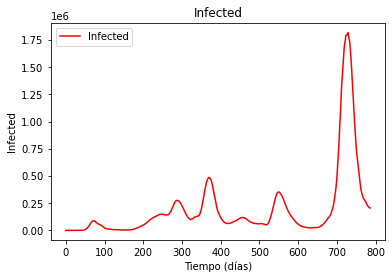

In [38]:
plt.plot(range(0, len(Ac_confirmed_alive_smooth)), Ac_confirmed_alive_smooth, 'r', label="Infected")
plt.xlabel("Tiempo (días)")
plt.ylabel("Infected")
plt.legend()

plt.title("Infected")

Text(0.5, 1.0, 'Deaths')

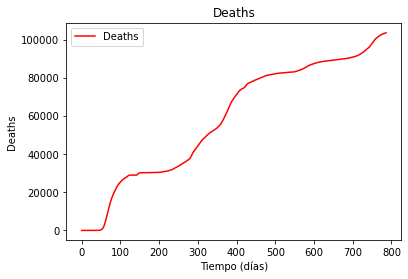

In [39]:
plt.plot(range(0, len(T_deaths_smooth_fix)), T_deaths_smooth_fix, 'r', label="Deaths")
plt.xlabel("Tiempo (días)")
plt.ylabel("Deaths")
plt.legend()

plt.title("Deaths")